# 簡単な構造のオートエンコーダー

In [1]:
from keras.layers import Input, Dense
from keras.models import Model

def create_models():
  encoding_dim = 32
  input_img = Input(shape=(784, ))
  encoded = Dense(encoding_dim, activation="relu")(input_img)
  decoded = Dense(784, activation="sigmoid")(encoded)
  autoencoder = Model(input_img, decoded)

  encoder = Model(input_img, encoded)

  encoded_input = Input(shape=(encoding_dim, ))
  decoder_layer = autoencoder.layers[-1]
  decoder = Model(encoded_input, decoder_layer(encoded_input))

  autoencoder.compile(optimizer="adadelta", loss="binary_crossentropy")
  return autoencoder, encoder, decoder

Using TensorFlow backend.


(60000, 784) (10000, 784)
Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 3s 46us/step - loss: 0.3527 - val_loss: 0.2709
Epoch 2/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.2633 - val_loss: 0.2522
Epoch 3/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.2424 - val_loss: 0.2308
Epoch 4/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.2234 - val_loss: 0.2135
Epoch 5/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.2083 - val_loss: 0.2007
Epoch 6/50
60000/60000 [==============================] - 2s 26us/step - loss: 0.1971 - val_loss: 0.1910
Epoch 7/50
60000/60000 [==============================] - 1s 25us/step - loss: 0.1885 - val_loss: 0.1834
Epoch 8/50
60000/60000 [==============================] - 1s 24us/step - loss: 0.1817 - val_loss: 0.1772
Epoch 9/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.175

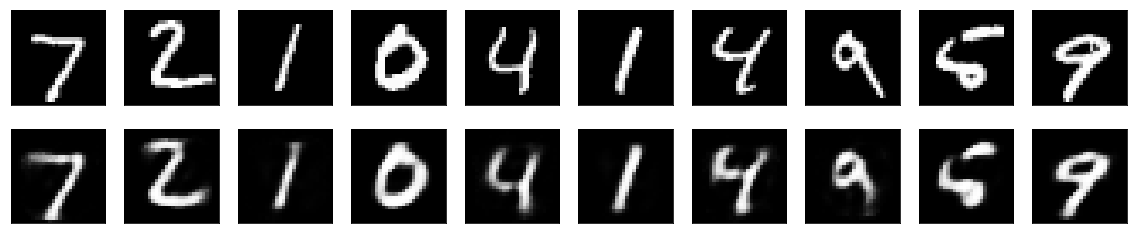

In [2]:
from keras.datasets import mnist
import numpy as np

autoencoder, encoder, decoder = create_models()

(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype(np.float32) / 255.
x_test = x_test.astype(np.float32) / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, x_test.shape)

autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

import matplotlib.pyplot as plt
%matplotlib inline

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

plt.show()